# AS HW3_3(야구 투수)

김보람  
2023-05-16

# ref

[python-data-analysis
data](https://github.com/yoonkt200/python-data-analysis/blob/master/data/picher_stats_2017.csv)

[Data Source](http://www.statiz.co.kr/)

In [30]:
library(ggplot2)

# 데이터셋

In [31]:
picher <- read.csv("~/Dropbox/coco/posts/Applied statistics/picher_stats_2017.csv")
head(picher)

In [32]:
dt <- subset(picher, select = -c(선수명,연봉.2017.))

In [33]:
head(dt)

In [38]:
dim(dt)

In [34]:
unique(dt$팀명)

# 회귀직선적합

In [35]:
model <- lm(연봉.2018. ~ .-팀명, dt)
summary(model)

In [13]:
model2 <- lm(연봉.2018. ~ ., dt)
summary(model2)

In [12]:
contrasts(factor(dt$팀명))

$H_0:$ 연봉.2018 = $\beta_0$ vs. $H_1: \beta_0+\beta_1$ 팀명
$+ \dots + \beta_{18}$ WAR

In [39]:
null_model<-lm(연봉.2018.~1, data=dt)

anova(null_model, model2)

-   수치형 데이터들끼리의 상관계수 확인..

In [43]:
dt_numeric <- dt[, sapply(dt, is.numeric)]
cor_matrix <- cor(dt_numeric)
print(cor_matrix)


                    승          패          세         홀드         블론
승          1.00000000  0.71074928  0.05374721  0.092871577  0.105280976
패          0.71074928  1.00000000  0.06625577  0.098617229  0.121282731
세          0.05374721  0.06625577  1.00000000  0.112715801  0.605229400
홀드        0.09287158  0.09861723  0.11271580  1.000000000  0.490076300
블론        0.10528098  0.12128273  0.60522940  0.490076300  1.000000000
경기        0.39707445  0.34314680  0.43429047  0.715527412  0.630526439
선발        0.77356048  0.77139546 -0.17706884 -0.285203788 -0.264160381
이닝        0.90609339  0.82901787  0.02027806  0.024630963  0.014176413
삼진.9      0.07837678  0.03175495  0.17043623  0.186790446  0.188422858
볼넷.9     -0.40471007 -0.38631296 -0.13139394 -0.146805736 -0.137019126
홈런.9     -0.11614705 -0.06446704 -0.07311138 -0.076474874 -0.064804420
BABIP      -0.17111074 -0.13335394 -0.08921166 -0.104306502 -0.112480228
LOB.        0.13117801 -0.02099439  0.16755694  0.048122986  0.100633065
ERA 

In [50]:
model3 <- lm(연봉.2018. ~ 승+선발+이닝+RA9.WAR+WAR, dt)
summary(model3)

# 회귀진단

## leverage

In [61]:
head(hatvalues(model2))

In [81]:
2*(26+1)/nrow(dt)

In [82]:
which(hatvalues(model2)>2*(26+1)/nrow(dt))

> $\bar h=2 \dfrac{p+1}{n}=2\dfrac{26+1}{152}=0.355263157894737$

## 이상치

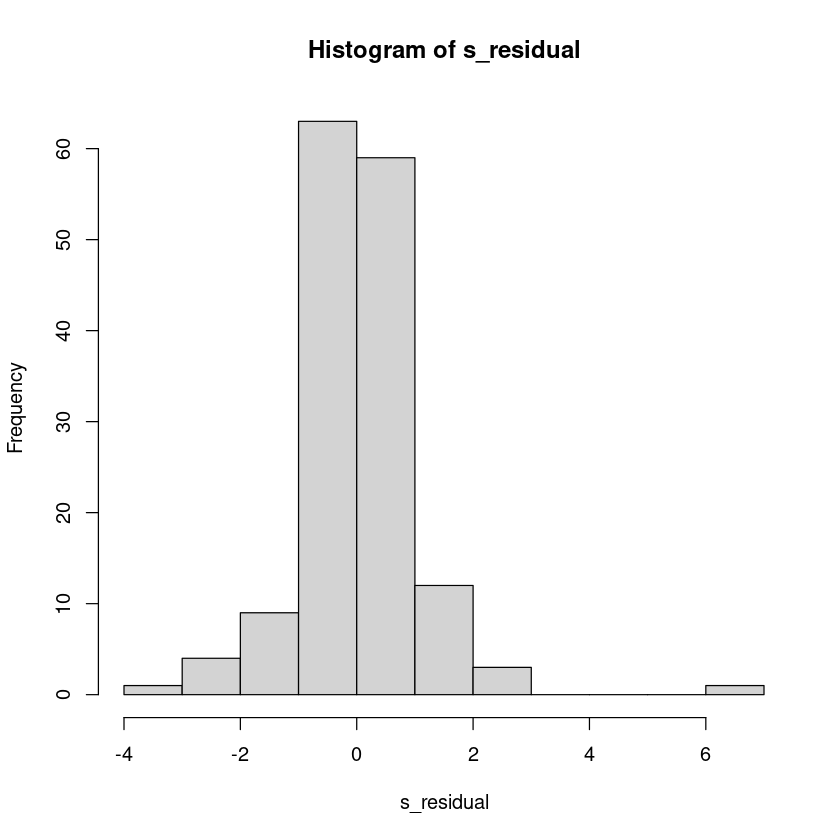

In [62]:
s_residual <- rstandard(model2)
head(s_residual)
hist(s_residual)

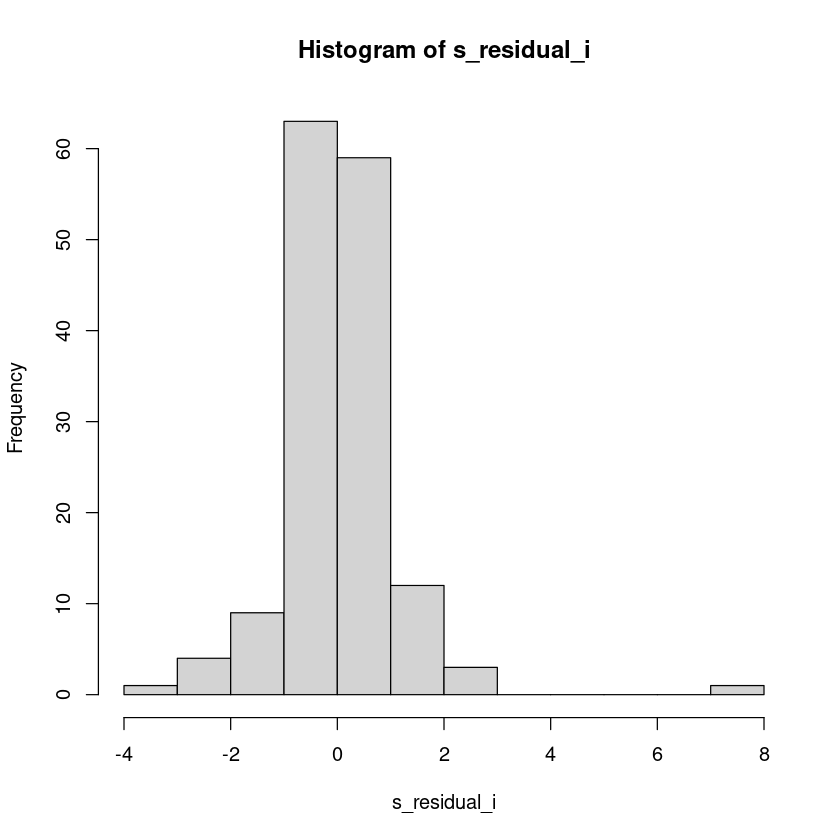

In [64]:
s_residual_i <- rstudent(model2)
head(s_residual_i)
hist(s_residual_i)

In [65]:
which.max(s_residual_i)
s_residual_i[which.max(s_residual_i)]

## 영향점

In [67]:
influence(model2)

In [59]:
influence.measures(model2)

`-` DIFFITS

In [68]:
dffits(model2) 

In [83]:
2*sqrt(26+1/(152-26-1))

In [90]:
nrow(dt)

In [84]:
which(abs(dffits(model2)) > 2*sqrt(26+1/(152-26-1)))

-   오잉 없다.

`-` Cook’s Distance

In [70]:
cooks.distance(model2)

In [85]:
qf(0.5,26,152-19-1)

In [86]:
which(cooks.distance(model2) >qf(0.5,26,132))

없네? 왜 없을까낭..

`-` Covratio

In [73]:
covratio(model2)

In [87]:
which(abs(covratio(model2)-1) > 3*(26+1)/152)

In [88]:
summary(influence.measures(model2))

Potentially influential observations of
     lm(formula = 연봉.2018. ~ ., data = dt) :

    dfb.1_ dfb.팀명KT dfb.팀명LG dfb.팀명NC dfb.팀명SK dfb.팀명두산
1   -0.02   0.02       0.01       0.01       0.07       0.00       
3    0.35  -0.78      -1.08_*    -0.99      -1.20_*    -1.52_*     
7    0.28  -0.39       0.20       0.06       0.05      -0.03       
13  -0.16   0.62       0.62       0.49       0.60       0.59       
20  -0.05  -0.03      -0.02      -0.05       0.00       0.01       
21  -0.09   0.06       0.01      -0.07       0.06       0.08       
23   0.00   0.00       0.00       0.00       0.00       0.00       
43  -0.04   0.04       0.10       0.01       0.01      -0.01       
83  -0.06  -0.01      -0.01      -0.01       0.01       0.00       
89  -0.23  -0.04      -0.05      -0.03       0.05       0.00       
90   0.01   0.02       0.01       0.01       0.00       0.02       
94   0.00   0.00       0.00      -0.01       0.00       0.01       
96   0.02  -0.04       0.01       0.00    

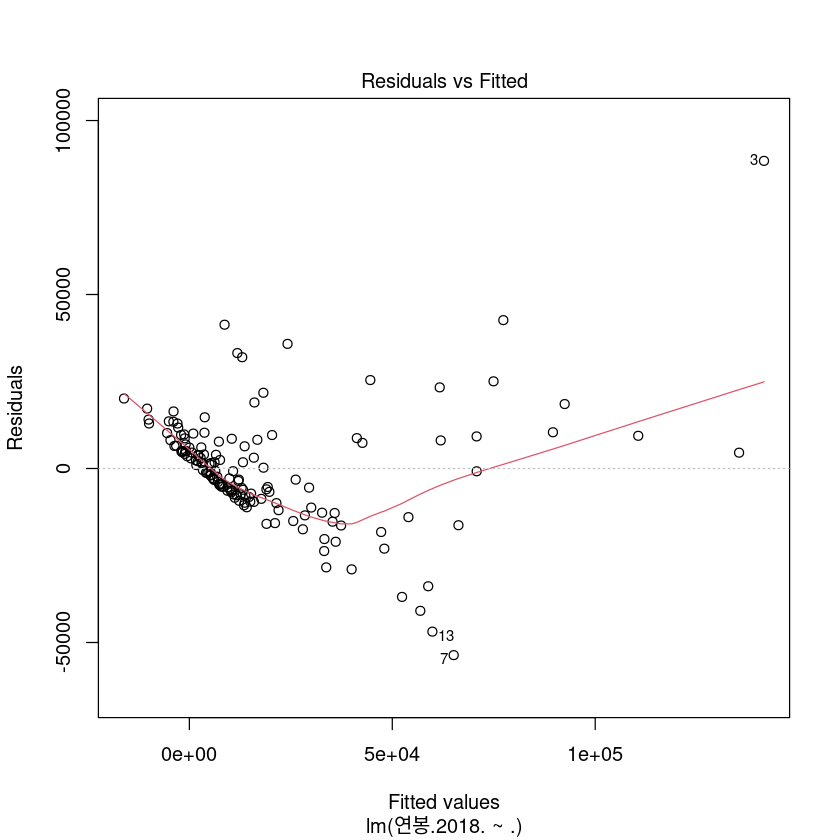

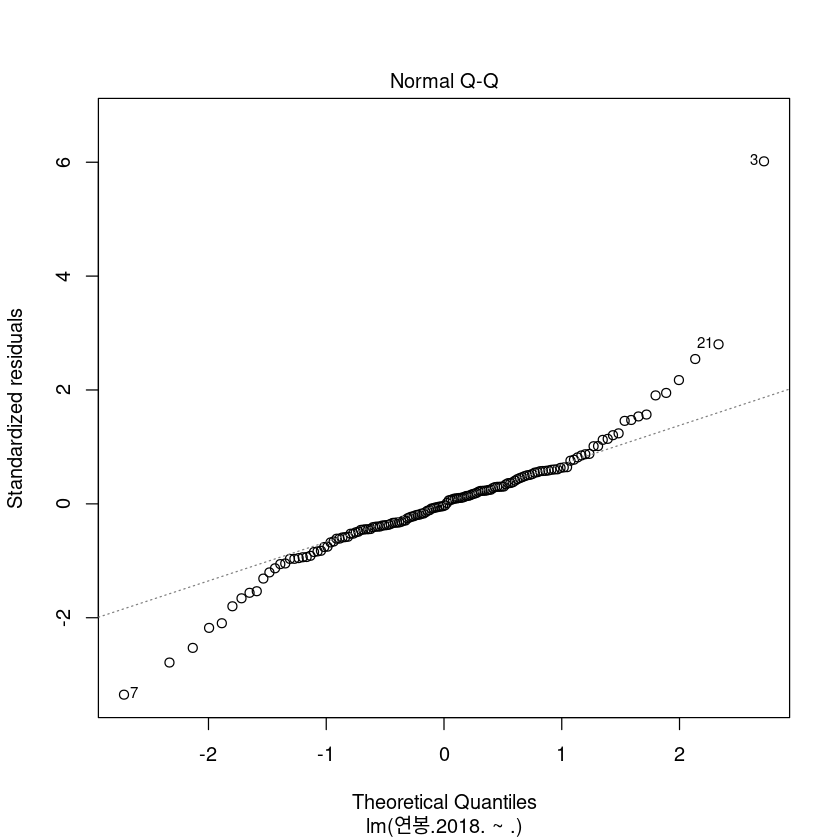

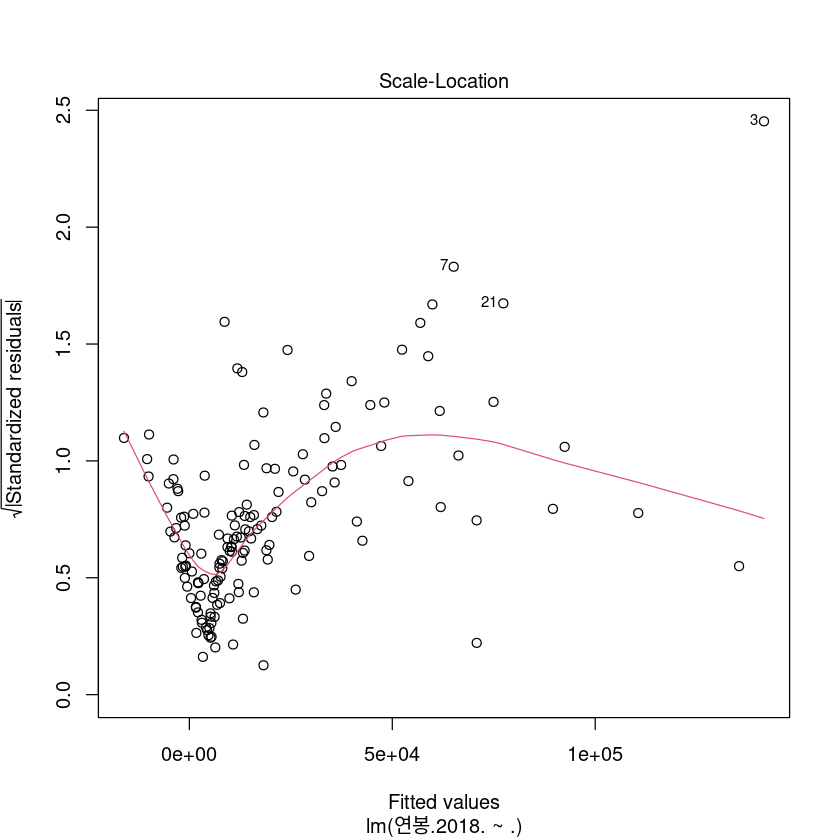

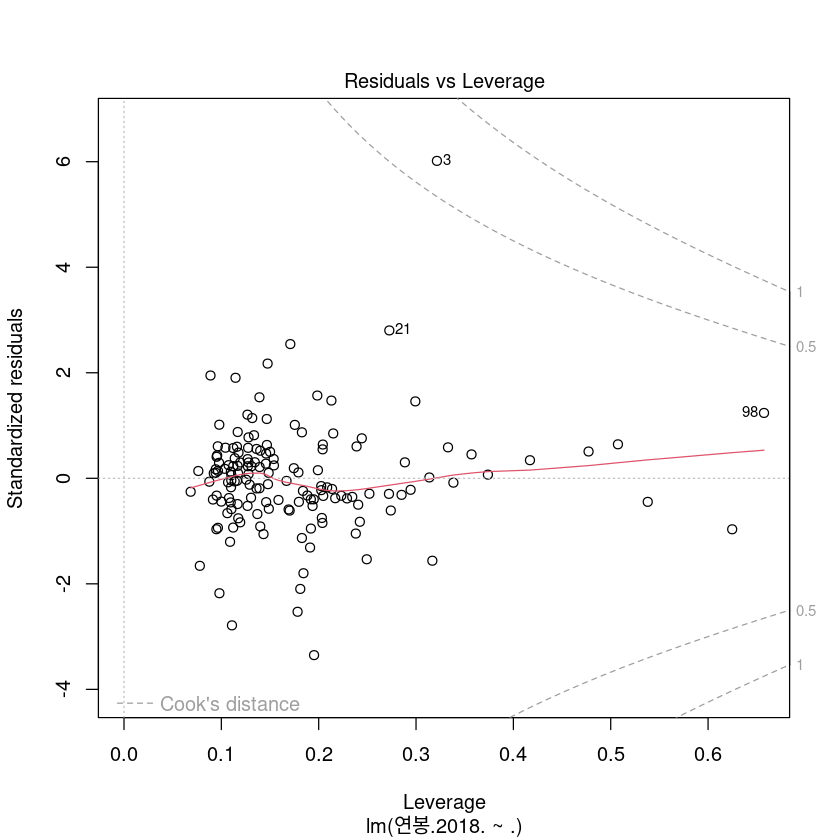

In [93]:

plot(model2)

In [97]:
## Shapiro-Wilk Test
## H0 : normal distribution vs. H1 : not H0
shapiro.test(resid(model2))

In [99]:
library(lmtest)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [100]:
### 등분산성
## H0 : 등분산 vs. H1 : 이분산 (Heteroscedasticity)
bptest(model2)

# 변수선택

## 단계적 전진선택법

In [101]:
m0 = lm(연봉.2018. ~ 1, data = dt)
# 절편먼저 시작

In [109]:
add1(m0,
 scope = 연봉.2018. ~팀명+승+패+세+홀드+블론+경기+선발+이닝+삼진.9+볼넷.9+홈런.9+BABIP+LOB.+ERA+RA9.WAR+FIP+kFIP+WAR,
 test = "F") 

In [111]:
m1 <- update(m0, ~ . +WAR)
summary(m1)

In [112]:
add1(m1,
 scope = 연봉.2018. ~팀명+승+패+세+홀드+블론+경기+선발+이닝+삼진.9+볼넷.9+홈런.9+BABIP+LOB.+ERA+RA9.WAR+FIP+kFIP+WAR,
 test = "F") 

-   너무 귀찮고… 복잡한데..

## AIC이용

### STEP

In [127]:
model_step = step(
 m0,
 scope = 연봉.2018. ~팀명+승+패+세+홀드+블론+경기+선발+이닝+삼진.9+볼넷.9+홈런.9+BABIP+LOB.+ERA+RA9.WAR+FIP+kFIP+WAR,
 direction = "both")
summary(model_step)

Start:  AIC=3144.3
연봉.2018. ~ 1

          Df  Sum of Sq        RSS    AIC
+ WAR      1 9.0535e+10 5.4022e+10 2996.7
+ RA9.WAR  1 7.9230e+10 6.5326e+10 3025.6
+ 승       1 7.3377e+10 7.1179e+10 3038.6
+ 이닝     1 6.2759e+10 8.1797e+10 3059.8
+ 선발     1 4.5409e+10 9.9147e+10 3089.0
+ 패       1 3.1910e+10 1.1265e+11 3108.4
+ 볼넷.9   1 1.5661e+10 1.2890e+11 3128.9
+ kFIP     1 1.2591e+10 1.3197e+11 3132.4
+ FIP      1 1.1403e+10 1.3315e+11 3133.8
+ ERA      1 6.7332e+09 1.3782e+11 3139.1
+ 세       1 6.4461e+09 1.3811e+11 3139.4
+ 경기     1 6.3714e+09 1.3819e+11 3139.4
+ LOB.     1 2.2831e+09 1.4227e+11 3143.9
+ 홈런.9   1 1.9575e+09 1.4260e+11 3144.2
<none>                  1.4456e+11 3144.3
+ 삼진.9   1 1.5567e+09 1.4300e+11 3144.7
+ BABIP    1 1.5139e+09 1.4304e+11 3144.7
+ 블론     1 1.3815e+09 1.4318e+11 3144.8
+ 홀드     1 4.3499e+07 1.4451e+11 3146.3
+ 팀명     8 5.7334e+09 1.3882e+11 3154.2

Step:  AIC=2996.69
연봉.2018. ~ WAR

          Df  Sum of Sq        RSS    AIC
+ 세       1 3.0430e+09 5.097

-   AIC를 이용하면 최종 모형은 “연봉.2018. ~ WAR + 세 + 승 + 패 +
    RA9.WAR” 이다.

### 후진

In [115]:
model_back = step(model2, direction = "backward")
summary(model_back)

Start:  AIC=3000.21
연봉.2018. ~ 팀명 + 승 + 패 + 세 + 홀드 + 블론 + 경기 + 
    선발 + 이닝 + 삼진.9 + 볼넷.9 + 홈런.9 + BABIP + 
    LOB. + ERA + RA9.WAR + FIP + kFIP + WAR

          Df  Sum of Sq        RSS    AIC
- 삼진.9   1    8197091 3.9798e+10 2998.2
- ERA      1   10387869 3.9800e+10 2998.2
- LOB.     1   64367797 3.9854e+10 2998.5
- kFIP     1   77615678 3.9867e+10 2998.5
- FIP      1   90577046 3.9880e+10 2998.6
- 볼넷.9   1  132645645 3.9922e+10 2998.7
- BABIP    1  170471360 3.9960e+10 2998.9
- 홈런.9   1  184287409 3.9974e+10 2998.9
- 홀드     1  204952742 3.9994e+10 2999.0
- 팀명     8 4201080265 4.3991e+10 2999.5
- 블론     1  392171281 4.0182e+10 2999.7
- RA9.WAR  1  448716954 4.0238e+10 2999.9
- 이닝     1  473170227 4.0263e+10 3000.0
- 선발     1  518773402 4.0308e+10 3000.2
<none>                  3.9789e+10 3000.2
- 패       1  842395946 4.0632e+10 3001.4
- 경기     1 1300498944 4.1090e+10 3003.1
- 세       1 1918682650 4.1708e+10 3005.4
- 승       1 2741990179 4.2531e+10 3008.3
- WAR      1 9184291500 4.89

### forwrad

In [116]:
model_forward = step(
 m0,
 scope = 연봉.2018. ~팀명+승+패+세+홀드+블론+경기+선발+이닝+삼진.9+볼넷.9+홈런.9+BABIP+LOB.+ERA+RA9.WAR+FIP+kFIP+WAR,
 direction = "forward")
summary(model_forward)

Start:  AIC=3144.3
연봉.2018. ~ 1

          Df  Sum of Sq        RSS    AIC
+ WAR      1 9.0535e+10 5.4022e+10 2996.7
+ RA9.WAR  1 7.9230e+10 6.5326e+10 3025.6
+ 승       1 7.3377e+10 7.1179e+10 3038.6
+ 이닝     1 6.2759e+10 8.1797e+10 3059.8
+ 선발     1 4.5409e+10 9.9147e+10 3089.0
+ 패       1 3.1910e+10 1.1265e+11 3108.4
+ 볼넷.9   1 1.5661e+10 1.2890e+11 3128.9
+ kFIP     1 1.2591e+10 1.3197e+11 3132.4
+ FIP      1 1.1403e+10 1.3315e+11 3133.8
+ ERA      1 6.7332e+09 1.3782e+11 3139.1
+ 세       1 6.4461e+09 1.3811e+11 3139.4
+ 경기     1 6.3714e+09 1.3819e+11 3139.4
+ LOB.     1 2.2831e+09 1.4227e+11 3143.9
+ 홈런.9   1 1.9575e+09 1.4260e+11 3144.2
<none>                  1.4456e+11 3144.3
+ 삼진.9   1 1.5567e+09 1.4300e+11 3144.7
+ BABIP    1 1.5139e+09 1.4304e+11 3144.7
+ 블론     1 1.3815e+09 1.4318e+11 3144.8
+ 홀드     1 4.3499e+07 1.4451e+11 3146.3
+ 팀명     8 5.7334e+09 1.3882e+11 3154.2

Step:  AIC=2996.69
연봉.2018. ~ WAR

          Df  Sum of Sq        RSS    AIC
+ 세       1 3042965364 5.097

## regsubsets

In [118]:
library(leaps)

In [122]:
fit <- regsubsets(연봉.2018.~., data=dt, nbest=1, nvmax=30, method='exhaustive',)
summary(fit)

In [123]:
with(summary(fit), round(cbind(which,rss,rsq,adjr2,cp,bic),3))

# feedback

-   WAR이 설명변수의 곱으로 이루어진 변수라 WAR이 들어가면 다른
    설명변수를 빼는게 좋다.

-   y로 잡은 연봉과 설명변수의 상관관계보다 WAR이 상관관계가 더 높다?
    WAR을 y로 잡고 연봉이 WAR에 영향을 주는지 확인해 보는게 더 좋았을듯.

-   2017년 연봉과 2018년 연봉을 비교해 보는 것도 좋았을 거 같다.

-   팀명은 범주형 변수로 굳이 어울리진 않는듯! 생각해보니 팀마다 잘하는
    투수도 있고 그럭저럭한 선수들도 있을테니..

-   이상치 영향점 레버리지 포인트에 해당되는 변수를 제외하고 돌려보자~